

Messier 91 (NGC 4548) is a barred spiral galaxy that is found in the south of Coma Berenices. It is in the local supercluster and is part of the Virgo Cluster of galaxies.

Galactic Latitude: 76.829620 [deg]

Galactic Longitude: 285.693280 [deg]

RA: 188.860220 [deg]

Dec: 14.496340 [deg]

Redshift: 0.001599 

M91 is one of over a thousand galaxies that make up the Virgo cluster — a group of galaxies that are gravitationally bound to one another. It is an anemic galaxy, meaning that it has a lower rate of star formation compared to other spiral galaxies.

M91 has been studied for more than 200 years. There have been many articles and research papers on galaxy M 91. There are research papers on kinematics of the galaxy. There have been papers on nuclear activities of the galaxy and on magnetic fields of the Galaxy and the Virgo Cluster Spirals.

It is Hypothesized that M91 has a Massive Black Hole at the center of the Galaxy




In [2]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as mtpltcm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
import csv
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
import astropy
from astropy import units as u
import astropy.wcs as fitswcs
#from specutils import Spectrum1D, SpectralRegion
from astropy.cosmology import WMAP9 as Cosmology
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage.morphology as morph
import skimage.exposure as skie
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
import sklearn
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
from scipy import signal
from scipy.fft import fftshift
#IGNORE WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore", category=RuntimeWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!unzip /content/gdrive/MyDrive/GALAXIES_CENTER.zip

In [4]:
NEAR_INFRARED_PATH = "/content/M91/NEAR_INFRARED/hst_11080_49_nic_nic3_f190n_drz.fits"
HST_OPTICAL_PATH = "/content/M91/OPTICAL/HST/idkv45010/idkv45010_drc.fits"

In [5]:
NI_OPEN = fits.open(NEAR_INFRARED_PATH)
HST_OPEN = fits.open(HST_OPTICAL_PATH)

In [6]:
OPEN_LIST = [NI_OPEN,HST_OPEN]
OPEN_NAME_LIST = ["NEAR_INFRARED","HST"]
for x_open,x_name in zip(OPEN_LIST,OPEN_NAME_LIST):
  print(x_name)
  print("---"*10)
  print(x_open.info())
  print("\n")

NEAR_INFRARED
------------------------------
Filename: /content/M91/NEAR_INFRARED/hst_11080_49_nic_nic3_f190n_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     524   ()      
  1  SCI           1 ImageHDU       179   (630, 630)   float32   
  2  WHT           1 ImageHDU        71   (630, 630)   float32   
  3  CTX           1 ImageHDU        71   (630, 630)   int32   
None


HST
------------------------------
Filename: /content/M91/OPTICAL/HST/idkv45010/idkv45010_drc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     856   ()      
  1  SCI           1 ImageHDU        91   (1036, 1091)   float32   
  2  WHT           1 ImageHDU        45   (1036, 1091)   float32   
  3  CTX           1 ImageHDU        40   (1036, 1091)   int32   
  4  HDRTAB        1 BinTableHDU    559   4R x 275C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 15A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D,

In [7]:
NI_PRIMARY_OPERATION = NI_OPEN[0].header
NI_PRIMARY_OPERATION

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
IRAF-TLM= '22:22:38 (02/12/2009)' / Time of last modification                   
NEXTEND =                    3 / Number of standard extensions                  
DATE    = '2009-12-03T03:22:38' / date this file was written (yyyy-mm-dd)       
FILENAME= 'n9wu49_NIC3_F190N_drz.fits' / name of file                           
FILETYPE= 'SCI      '          / type of data found in data file                
                                                                                
TELESCOP= 'HST'                / telescope used to acquire data                 
INSTRUME= 'NICMOS'          

In [8]:
print(NI_PRIMARY_OPERATION.comments["TARGNAME"] + " ",NI_PRIMARY_OPERATION["TARGNAME"]) #proposer's target name M 91
print(NI_PRIMARY_OPERATION.comments["RA_TARG"] + " ",NI_PRIMARY_OPERATION["RA_TARG"])
print(NI_PRIMARY_OPERATION.comments["DEC_TARG"] + " ",NI_PRIMARY_OPERATION["DEC_TARG"])
print(NI_PRIMARY_OPERATION.comments["GAL_LAT"] + " ",NI_PRIMARY_OPERATION["GAL_LAT"])
print(NI_PRIMARY_OPERATION.comments["GAL_LONG"] + " ",NI_PRIMARY_OPERATION["GAL_LONG"])

proposer's target name  NGC4548
right ascension of the target (deg) (J2000)  188.860125
declination of the target (deg) (J2000)  14.49633333333
galactic latitude of the target (deg) (J2000)  76.829612
galactic longitude of the target (deg) (J2000)  285.692807


In [9]:
NI_SCI_OPERATION=NI_OPEN[1].header
NI_SCI_OPERATION

XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  630 / Axis length                                    
NAXIS2  =                  630 / Axis length                                    
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
EXTNAME = 'SCI     '           / Extension name                                 
EXTVER  =                    1 / Extension version                              
IRAF-TLM= '22:25:14 (02/12/2009)' / Time of last modification                   
DATE    = '2009-12-03T03:22:38' / Date FITS file was generated                  
INHERIT =                   

In [10]:
print(NI_PRIMARY_OPERATION.comments["ECL_LAT"] + " ",NI_PRIMARY_OPERATION["ECL_LAT"])
print(NI_PRIMARY_OPERATION.comments["ECL_LONG"] + " ",NI_PRIMARY_OPERATION["ECL_LONG"])
print(NI_PRIMARY_OPERATION.comments["SUNANGLE"] + " ",NI_PRIMARY_OPERATION["SUNANGLE"])
print(NI_PRIMARY_OPERATION.comments["MOONANGL"] + " ",NI_PRIMARY_OPERATION["MOONANGL"])
print(NI_PRIMARY_OPERATION.comments["DATE-OBS"] + " ",NI_PRIMARY_OPERATION["DATE-OBS"])
print(NI_PRIMARY_OPERATION.comments["TIME-OBS"] + " ",NI_PRIMARY_OPERATION["TIME-OBS"])
print(NI_PRIMARY_OPERATION.comments["EXPSTART"] + " ",NI_PRIMARY_OPERATION["EXPSTART"])
print(NI_PRIMARY_OPERATION.comments["EXPEND"] + " ",NI_PRIMARY_OPERATION["EXPEND"])
print(NI_PRIMARY_OPERATION.comments["EXPTIME"] + " ",NI_PRIMARY_OPERATION["EXPTIME"])
print(NI_PRIMARY_OPERATION.comments["PATTERN1"] + " ",NI_PRIMARY_OPERATION["PATTERN1"])
print(NI_PRIMARY_OPERATION.comments["P1_SHAPE"] + " ",NI_PRIMARY_OPERATION["P1_SHAPE"])
print(NI_PRIMARY_OPERATION.comments["P1_PURPS"] + " ",NI_PRIMARY_OPERATION["P1_PURPS"])
print(NI_PRIMARY_OPERATION.comments["P1_NPTS"] + " ","%.30f" % NI_PRIMARY_OPERATION["P1_NPTS"])
print(NI_PRIMARY_OPERATION.comments["P1_PSPAC"] + " ","%.30f" % NI_PRIMARY_OPERATION["P1_PSPAC"])
print(NI_PRIMARY_OPERATION.comments["P1_LSPAC"] + " ","%.30f" %  NI_PRIMARY_OPERATION["P1_LSPAC"])

ecliptic latitude of the target (deg) (J2000)  16.796813
ecliptic longitude of the target (deg) (J2000)  182.229553
angle between sun and V1 axis  163.001923
angle between moon and V1 axis  156.546997
UT date of start of observation (yyyy-mm-dd)  2007-03-20
UT time of start of observation (hh:mm:ss)  06:45:32
exposure start time (Modified Julian Date)  54179.20960282
exposure end time (Modified Julian Date)  54179.28422045
exposure duration (seconds)--calculated  1343.763
primary pattern type  NIC-SPIRAL-DITH
primary pattern shape  SPIRAL
primary pattern purpose  DITHER
number of points in primary pattern  6.000000000000000000000000000000
point spacing for primary pattern (arc-sec)  0.900000000000000022204460492503
line spacing for primary pattern (arc-sec)  0.000000000000000000000000000000


Question 3

In [11]:
HST_SCI = HST_OPEN[1].data
HST_WHT = HST_OPEN[2].data
HST_CTX = HST_OPEN[3].data

In [12]:
HST_SCI=HST_OPEN[1].data
WIDE_SCALE_HST = HST_SCI[200:900,200:900]
ZOOMED_X3_SCALE_HST = HST_SCI[425:625,340:700]
NUCLEUS_SCALE_HST = HST_SCI[525:575,480:530]

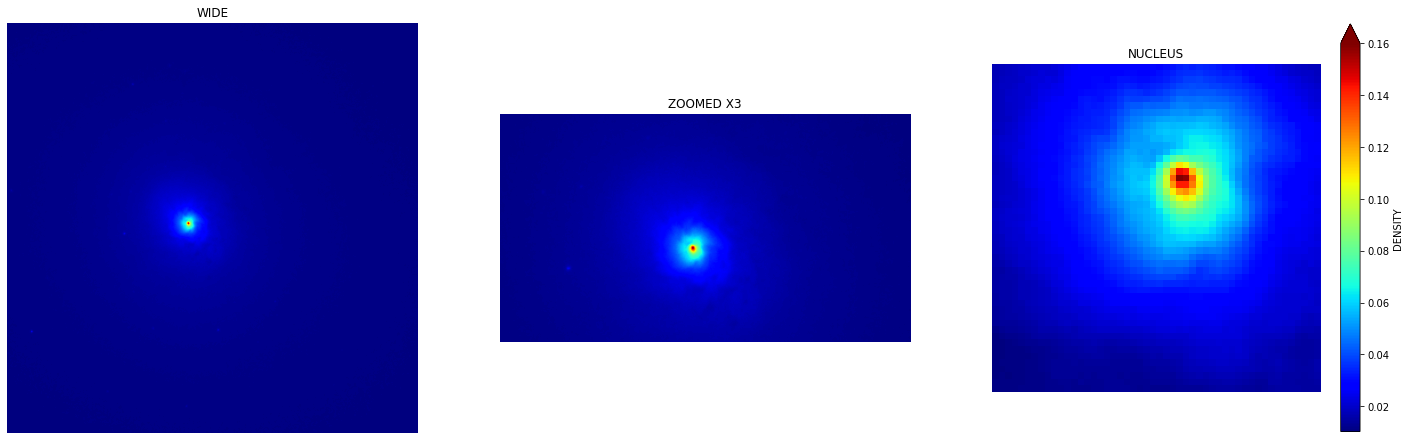

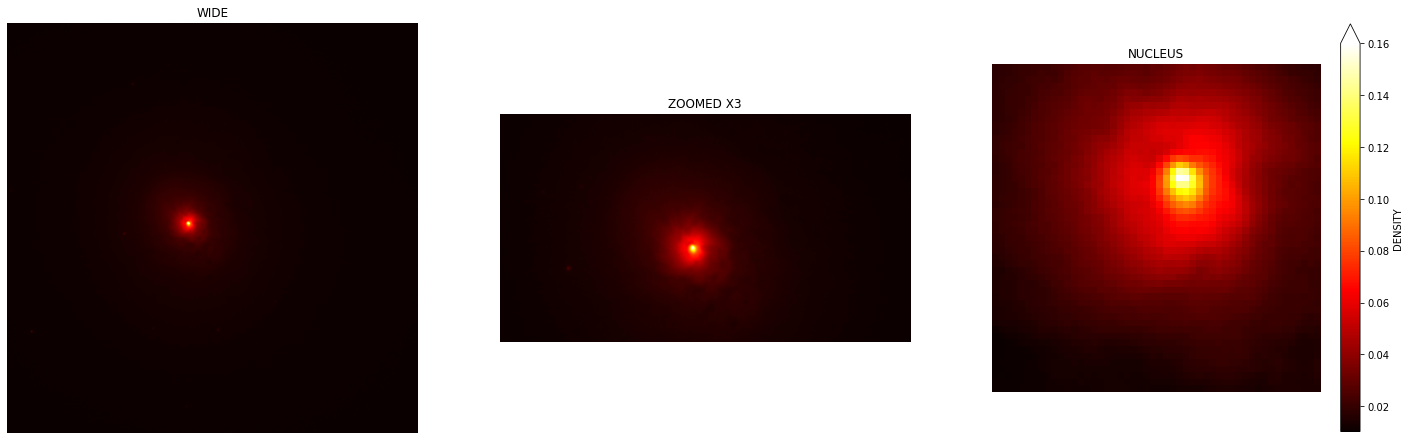

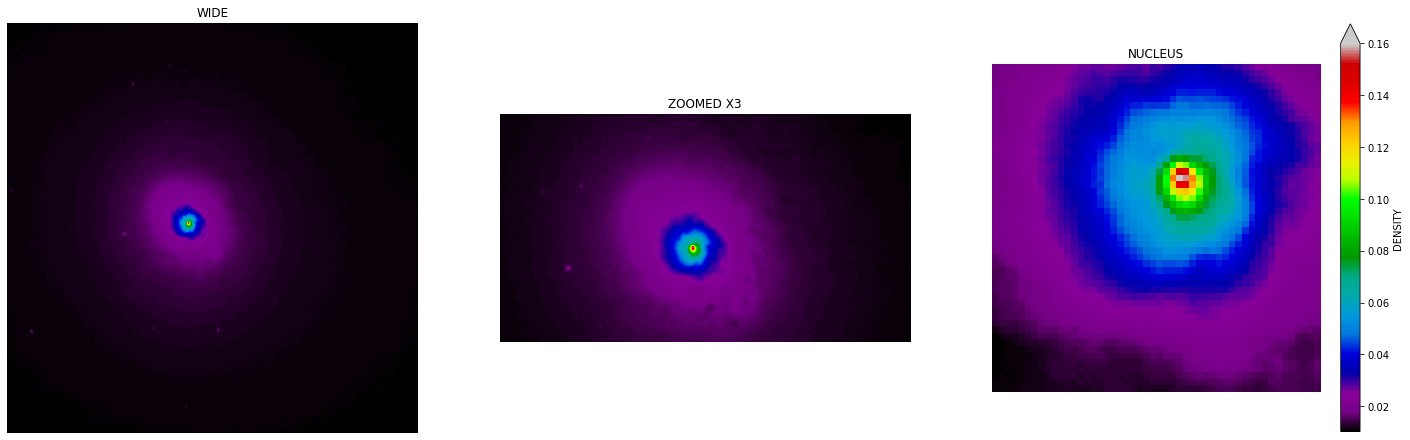

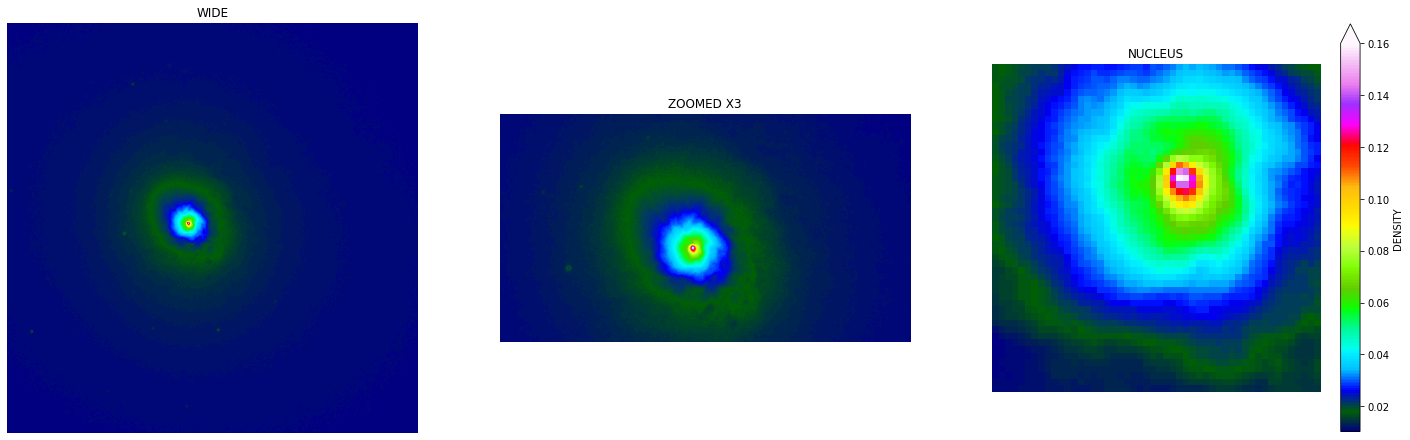

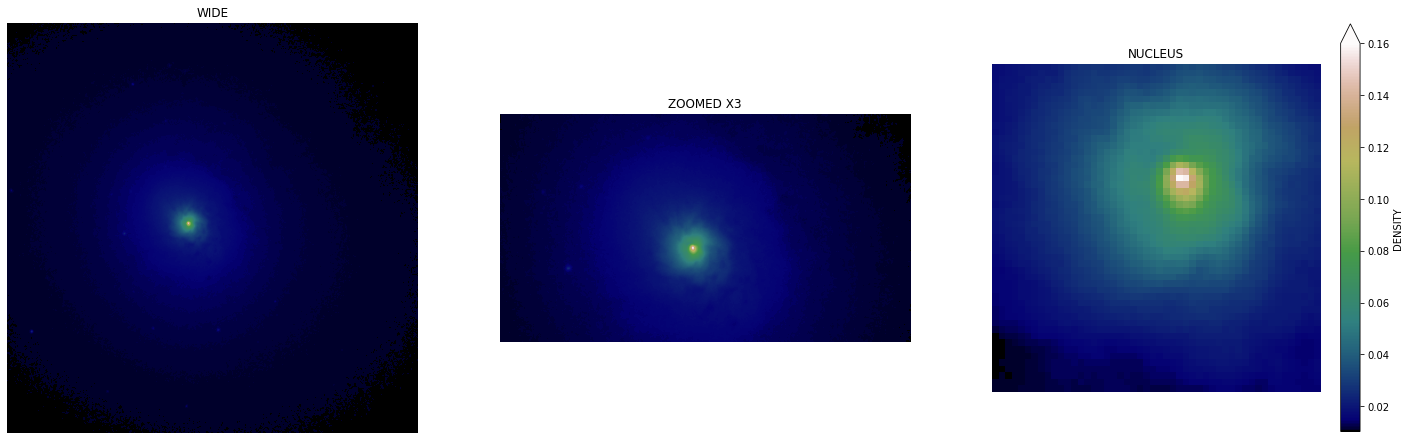

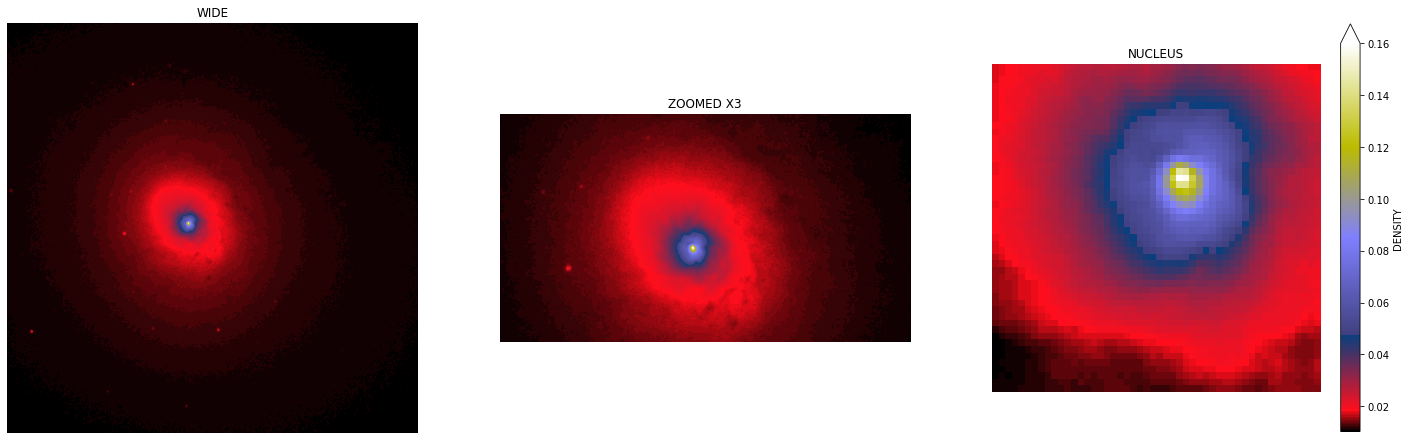

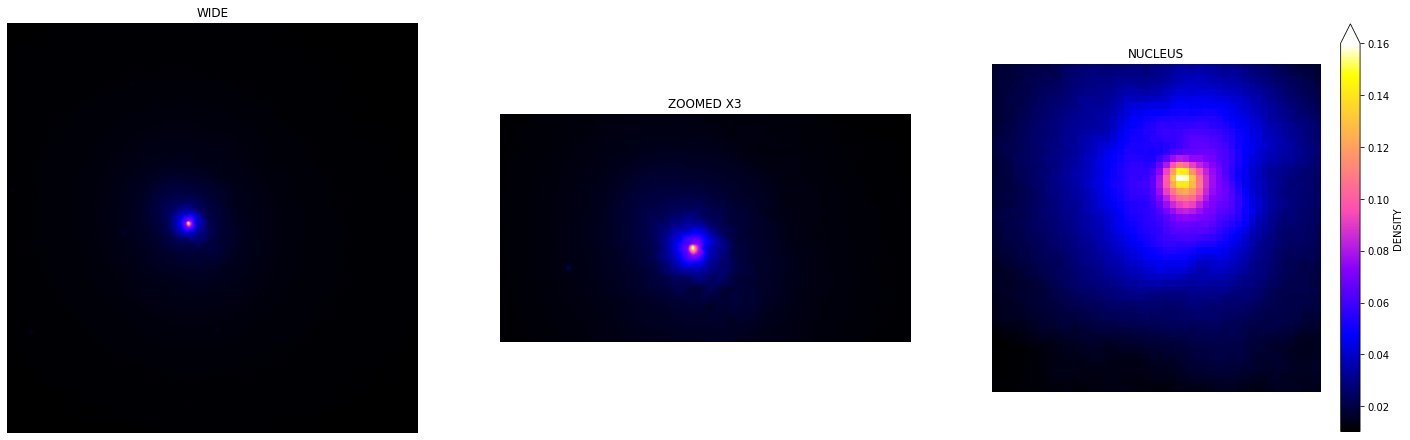

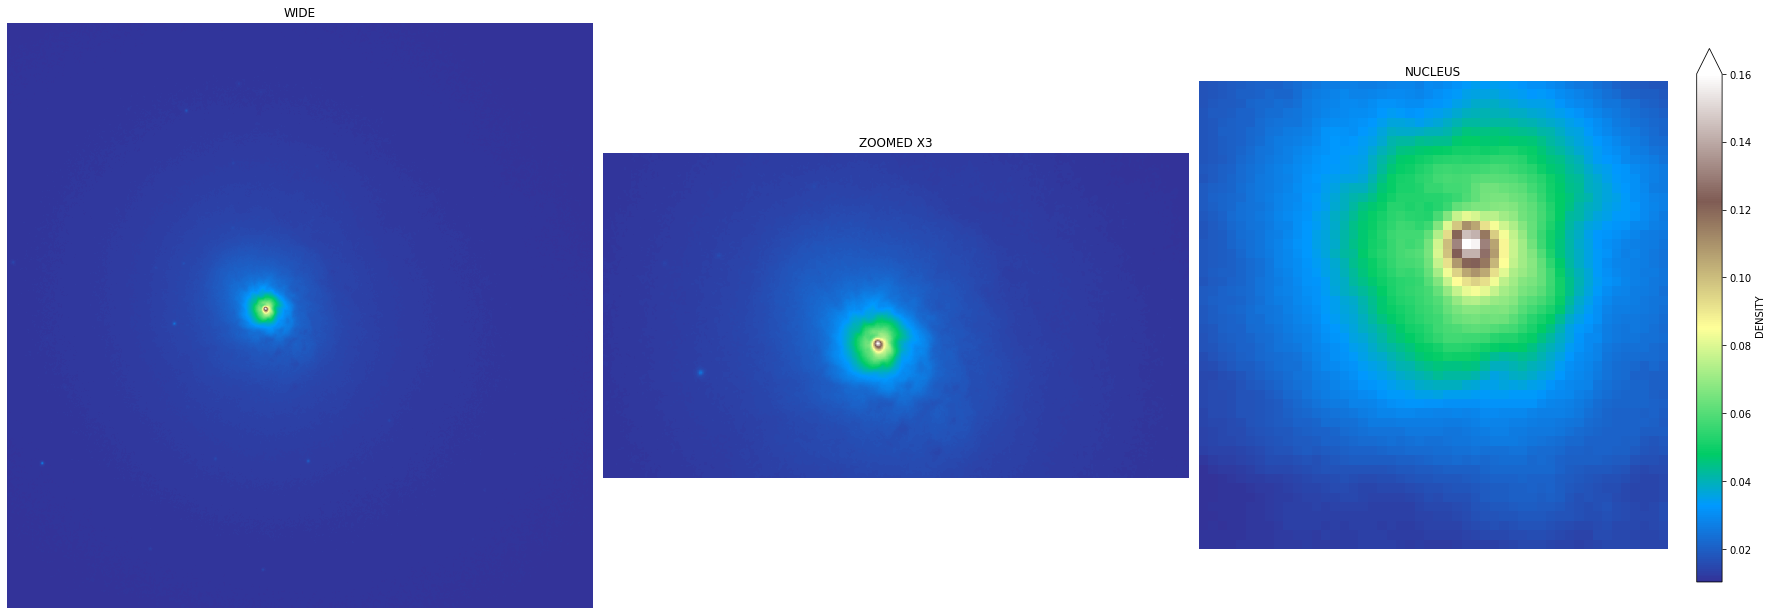

In [14]:
SPECTRAL_LIST = ["jet","hot","nipy_spectral","gist_ncar","gist_earth","gist_stern","gnuplot2",'terrain']
for x_spec in SPECTRAL_LIST:
  figure,axis = plt.subplots(1,3,figsize=(25,25))
  axis[0].imshow(WIDE_SCALE_HST / 255.,cmap=x_spec)
  axis[0].set_title("WIDE")
  axis[0].axis("off")
  axis[1].imshow(ZOOMED_X3_SCALE_HST / 255.,cmap=x_spec)
  axis[1].set_title("ZOOMED X3")
  axis[1].axis("off")
  DENSITY_FUNC = axis[2].imshow(NUCLEUS_SCALE_HST /255.,cmap=x_spec)
  axis[2].set_title("NUCLEUS")
  axis[2].axis("off")
  figure.colorbar(DENSITY_FUNC,shrink=0.3,label="DENSITY",extend="max")
plt.tight_layout()
plt.show()

In [15]:
SPECTRAL_LIST = ["jet","hot","nipy_spectral", "gist_ncar","gist_earth","gist_stern","gnuplot2",'terrain']
M_ZOOMED_X3_SCALE_HST = filters.meijering(ZOOMED_X3_SCALE_HST)
M_NUCLEUS_SCALE_HST = filters.meijering(NUCLEUS_SCALE_HST)

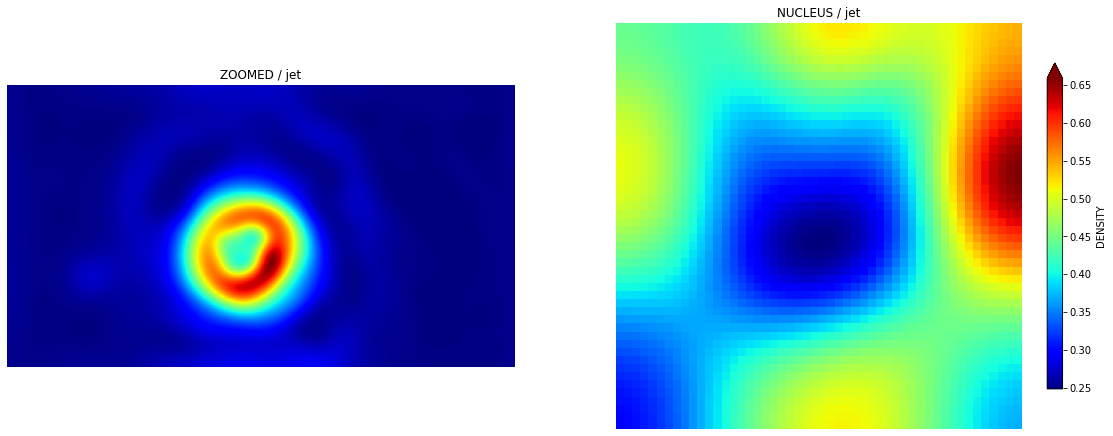

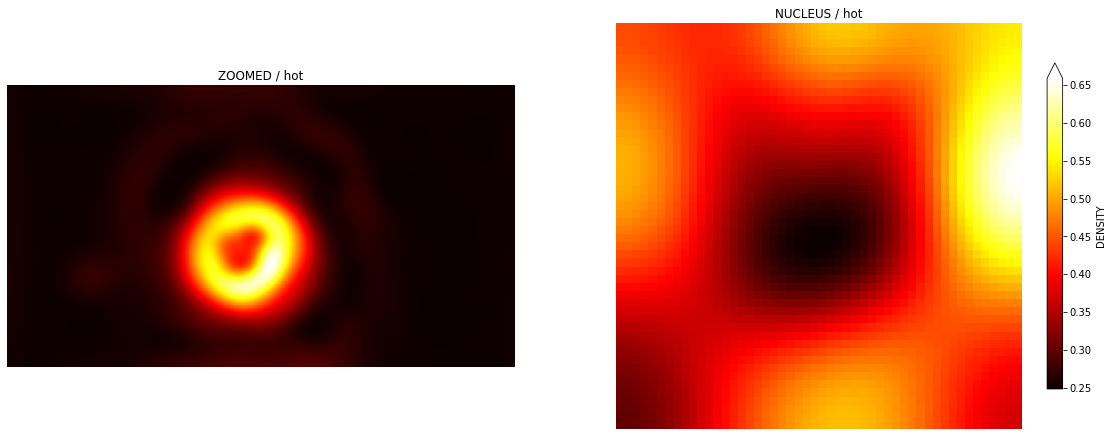

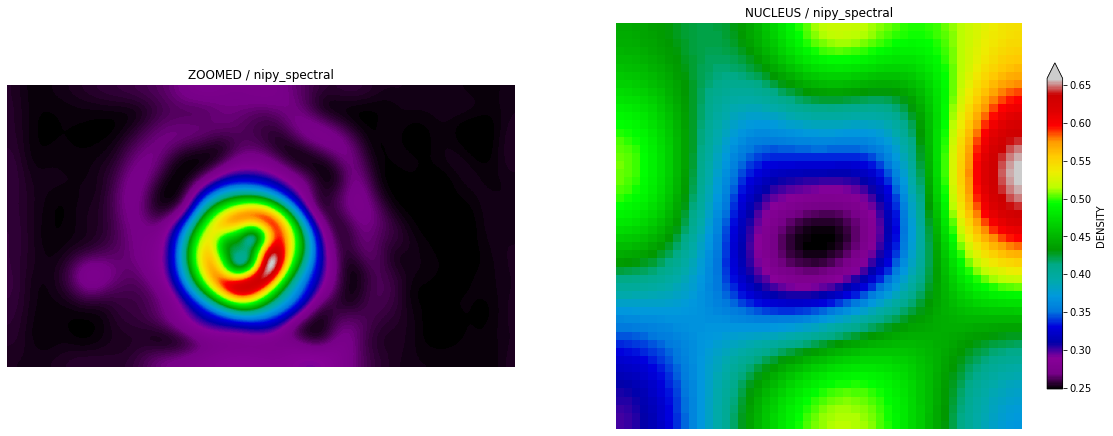

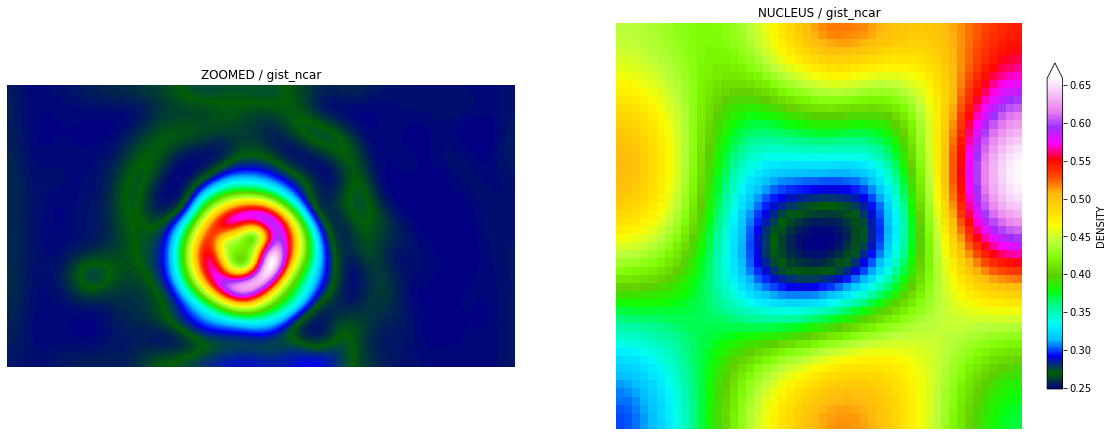

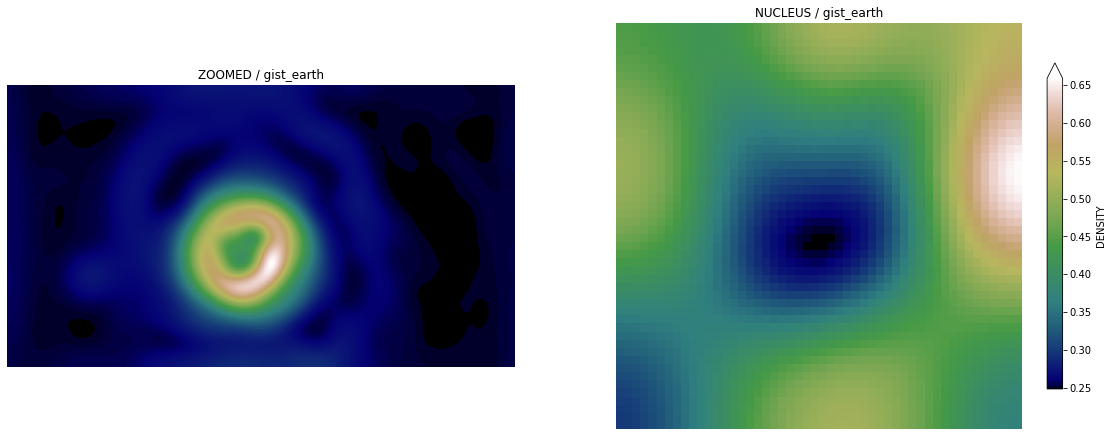

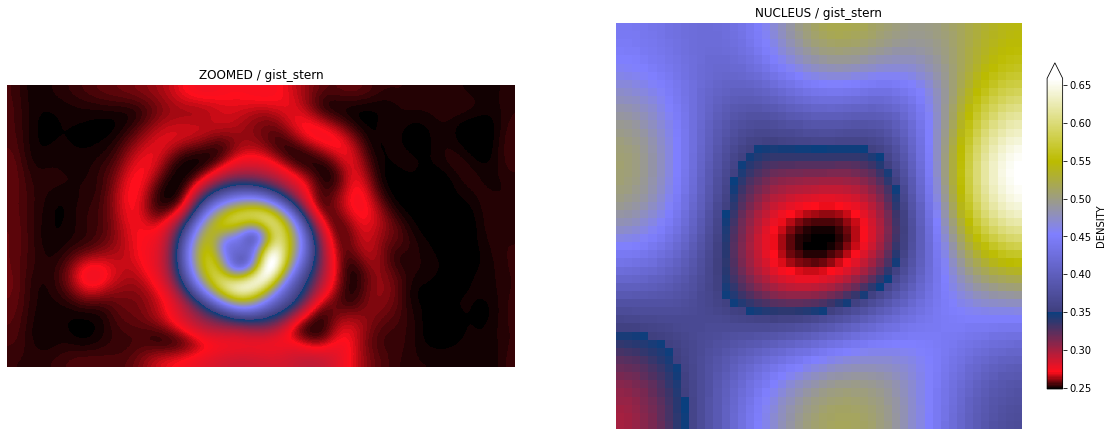

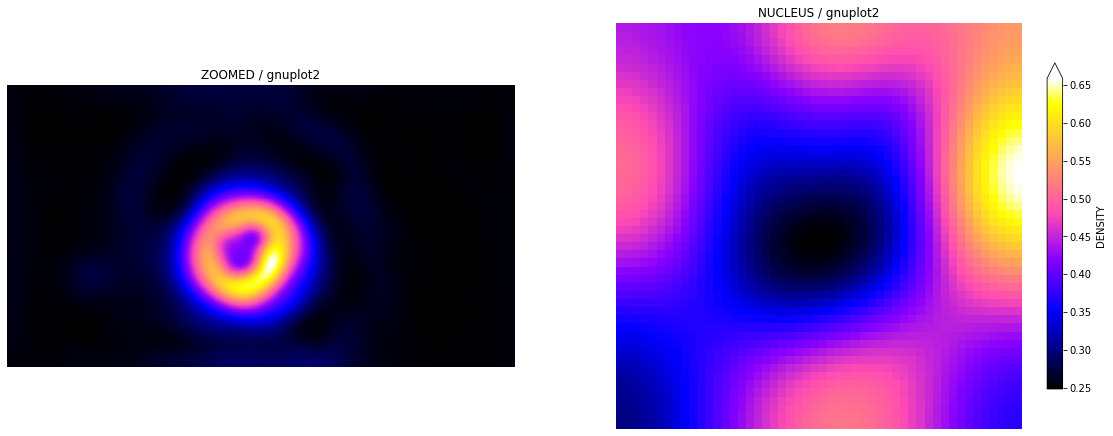

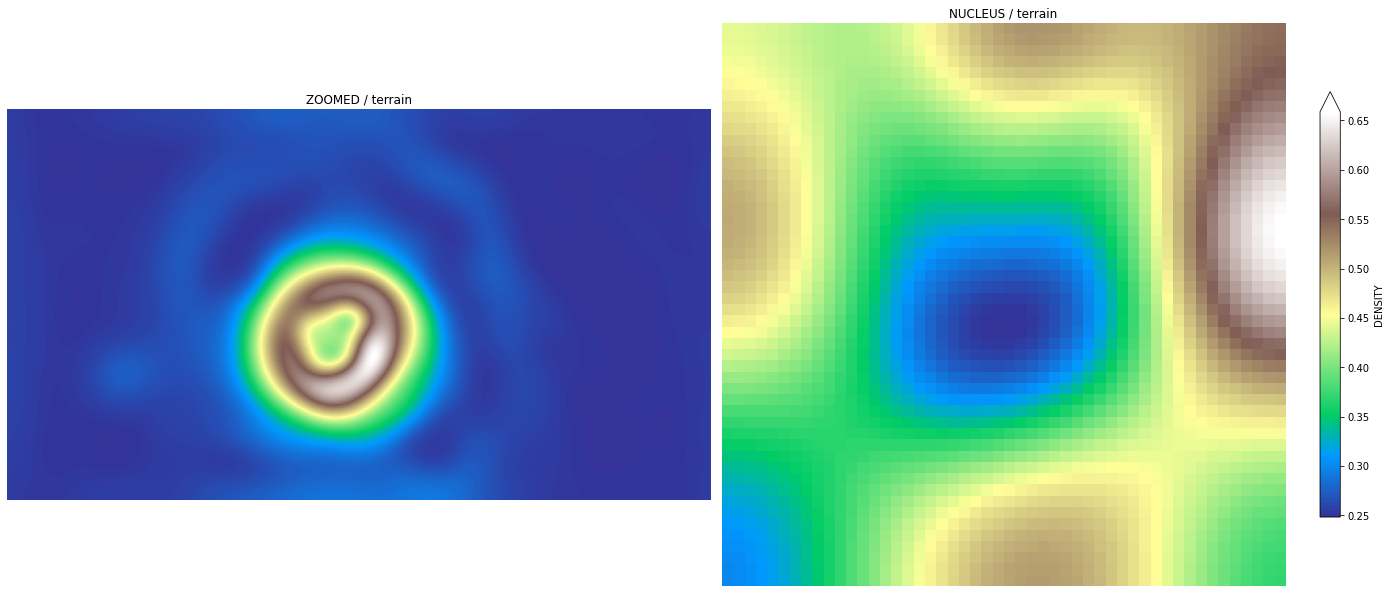

In [16]:
M_GAUSS_ZOOMED_X2 = gaussian_filter(M_ZOOMED_X3_SCALE_HST,sigma=7)
M_GAUSS_NUCLEUS = gaussian_filter(M_NUCLEUS_SCALE_HST,sigma=7)
for x_spec in SPECTRAL_LIST:
    figure,axis = plt.subplots(1,2,figsize=(20,20))
    axis[0].imshow(M_GAUSS_ZOOMED_X2,cmap=x_spec)
    axis[0].set_title("ZOOMED" + " / "+ x_spec)
    axis[0].axis("off")
    DENSITY_FUNC = axis[1].imshow(M_GAUSS_NUCLEUS,cmap=x_spec)
    axis[1].set_title("NUCLEUS" + " / "+ x_spec)
    axis[1].axis("off")
    figure.colorbar(DENSITY_FUNC,shrink=0.3,label="DENSITY",extend="max")
plt.tight_layout()
plt.show()

In [17]:
BM_ZOOMED_X3_SCALE_HST = filters.meijering(ZOOMED_X3_SCALE_HST,black_ridges=False)
BM_NUCLEUS_SCALE_HST = filters.meijering(NUCLEUS_SCALE_HST,black_ridges=False)

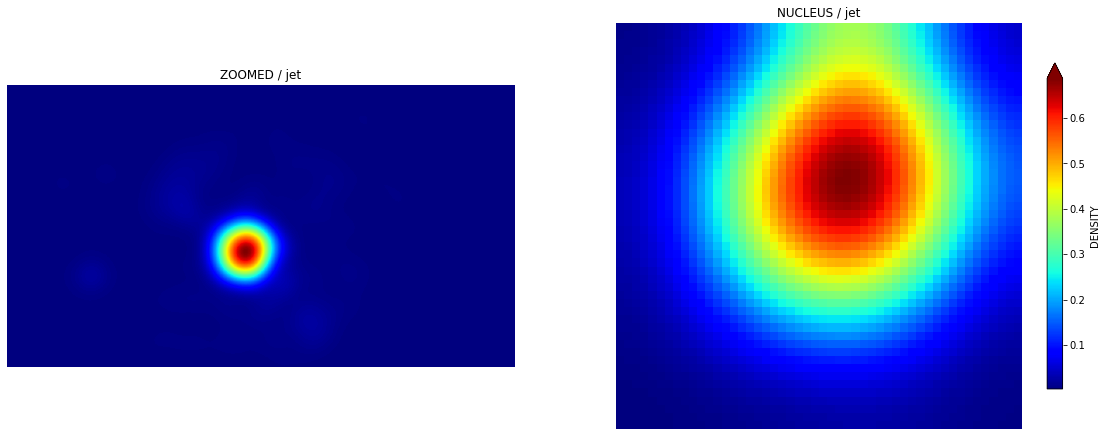

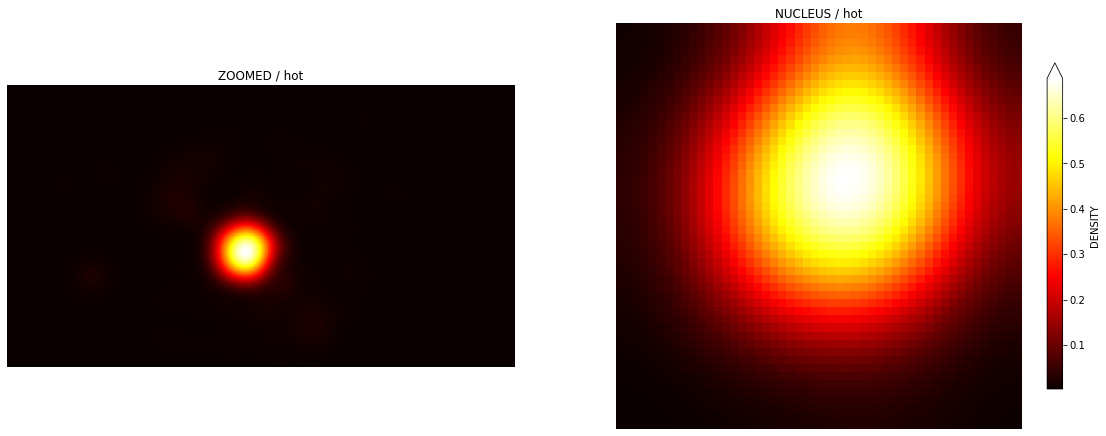

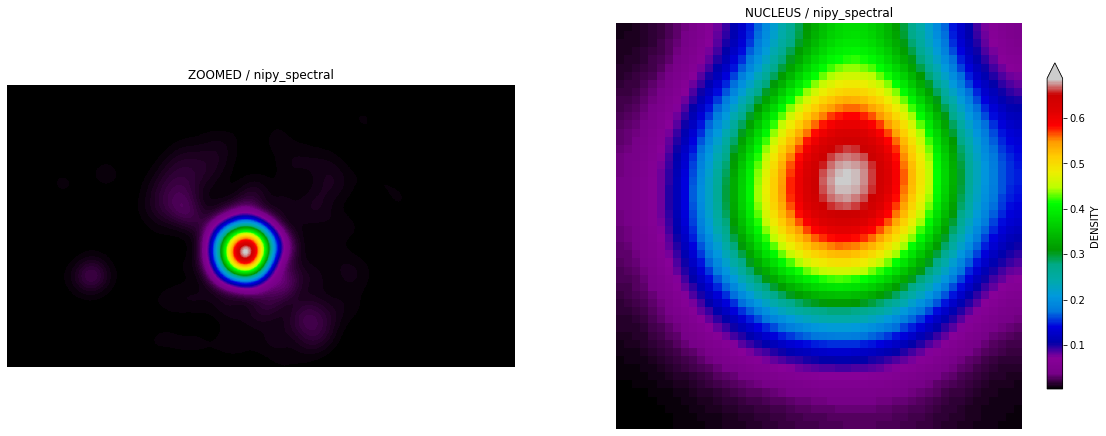

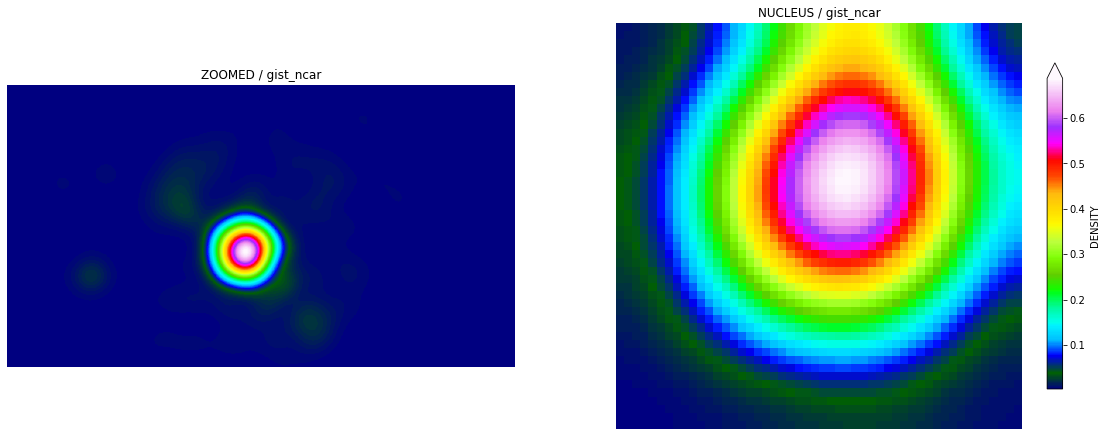

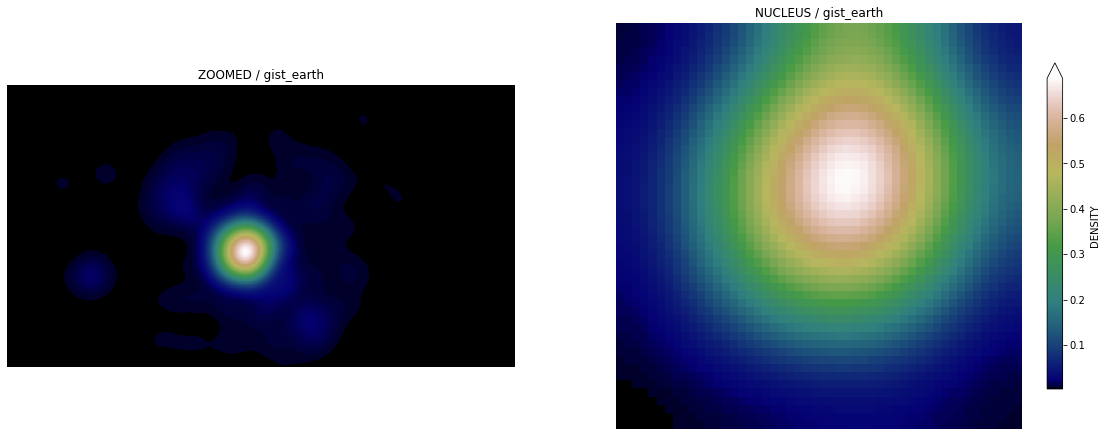

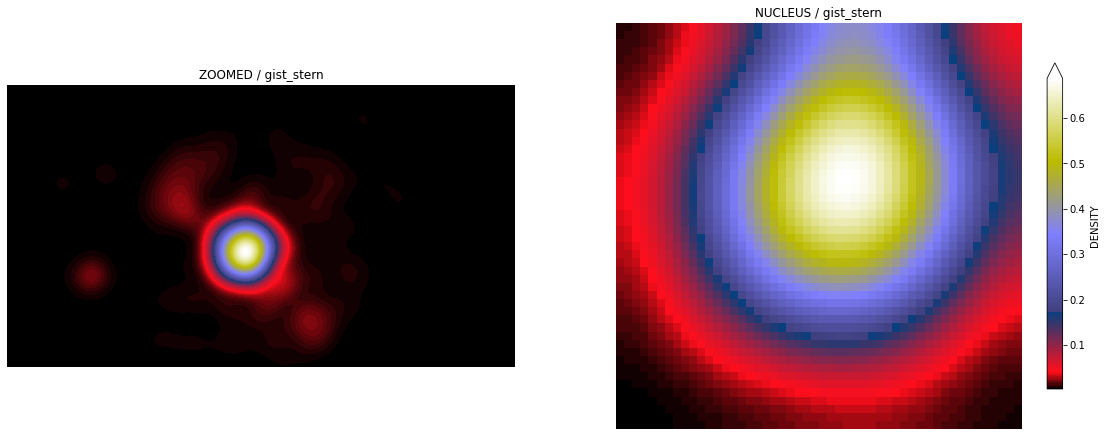

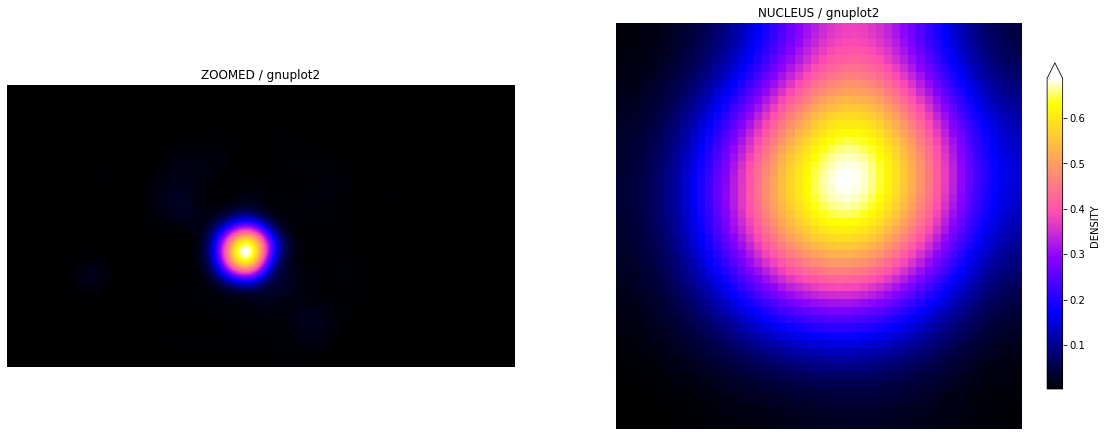

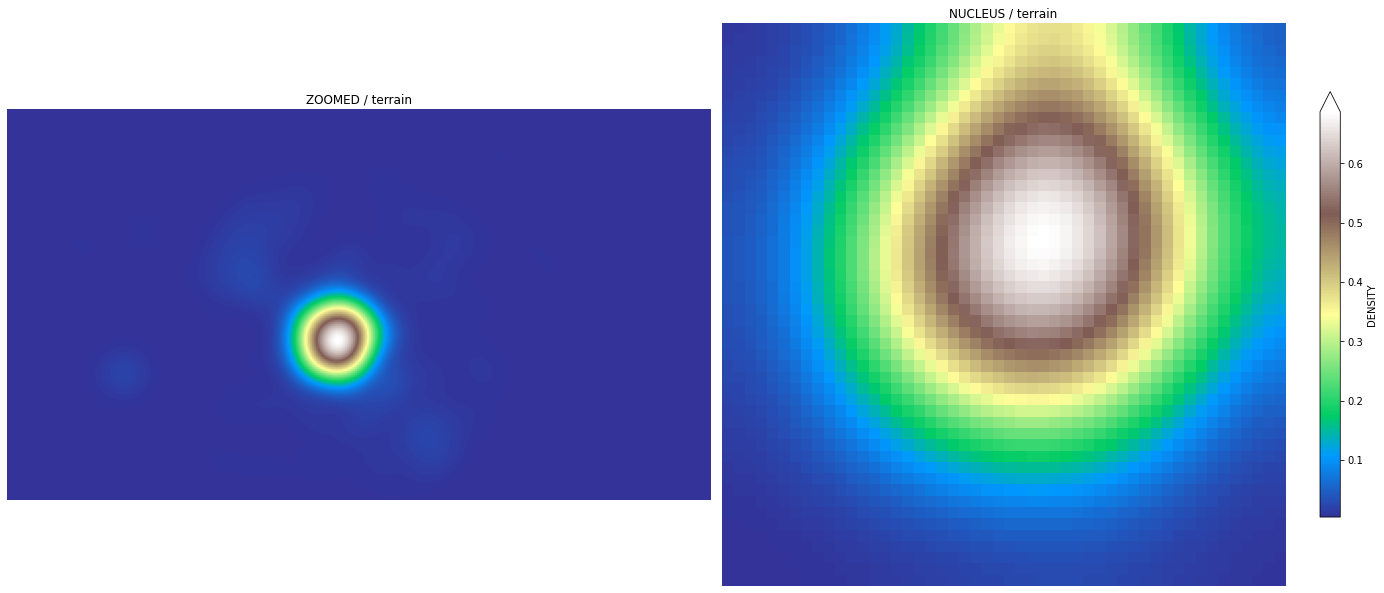

In [18]:
BM_GAUSS_ZOOMED_X2 = gaussian_filter(BM_ZOOMED_X3_SCALE_HST,sigma=7)
BM_GAUSS_NUCLEUS = gaussian_filter(BM_NUCLEUS_SCALE_HST,sigma=7)
for x_spec in SPECTRAL_LIST:
    figure,axis = plt.subplots(1,2,figsize=(20,20))
    axis[0].imshow(BM_GAUSS_ZOOMED_X2,cmap=x_spec)
    axis[0].set_title("ZOOMED" + " / "+ x_spec)
    axis[0].axis("off")
    DENSITY_FUNC = axis[1].imshow(BM_GAUSS_NUCLEUS,cmap=x_spec)
    axis[1].set_title("NUCLEUS" + " / "+ x_spec)
    axis[1].axis("off")
    figure.colorbar(DENSITY_FUNC,shrink=0.3,label="DENSITY",extend="max")
plt.tight_layout()
plt.show()

BM Meijering Filter

1) In the BM Meijering Filter, the image of the galaxy becomes smoothened by the guassian kernel run by it and it gets rid of the black ridges.

2) In this filter the image is clear on the stages from the nucleus differentiated by the colours in the 'gnuplot2' color map.

3) The Black Hole is at the Center of the Galaxy which can be identified from some of the spectrums.

The Meijering filter gives the best insights and the 'hot' or 'gist stern' color map gives a better picture of the black hole


Question 4

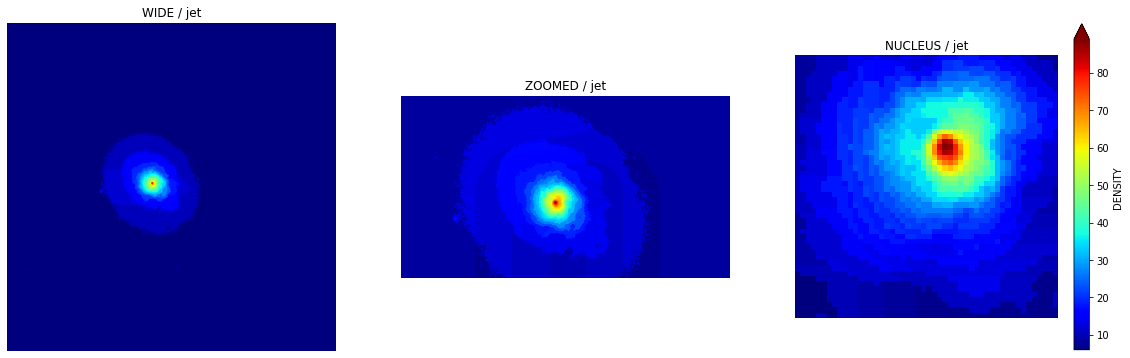

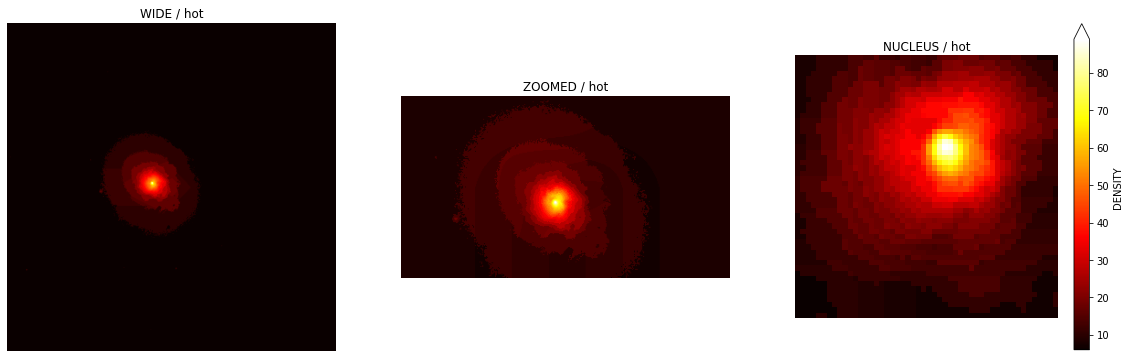

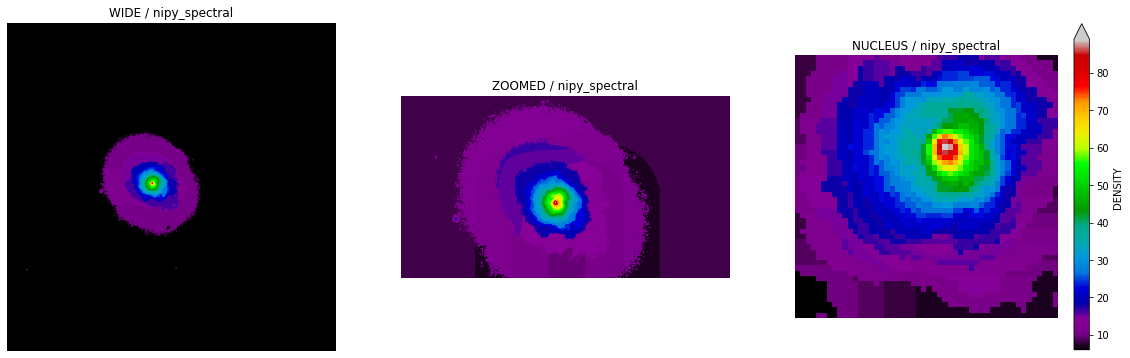

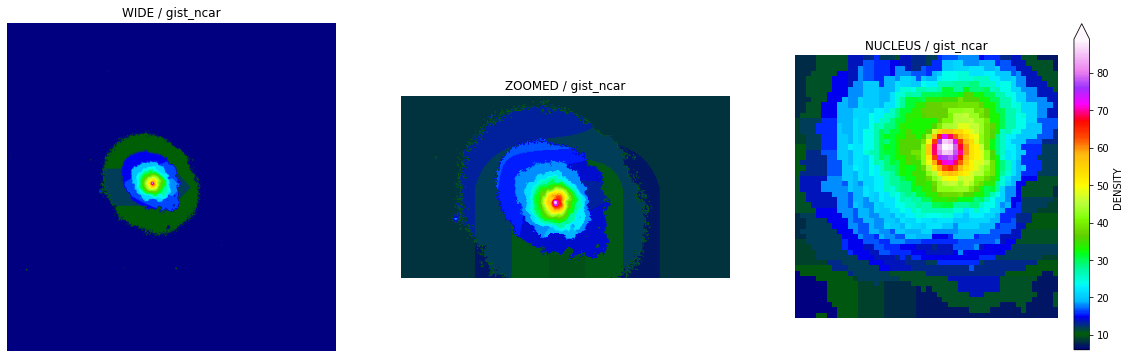

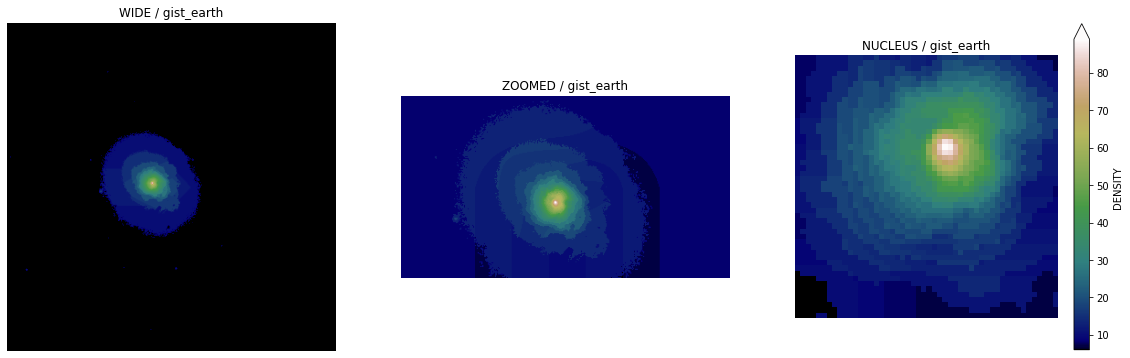

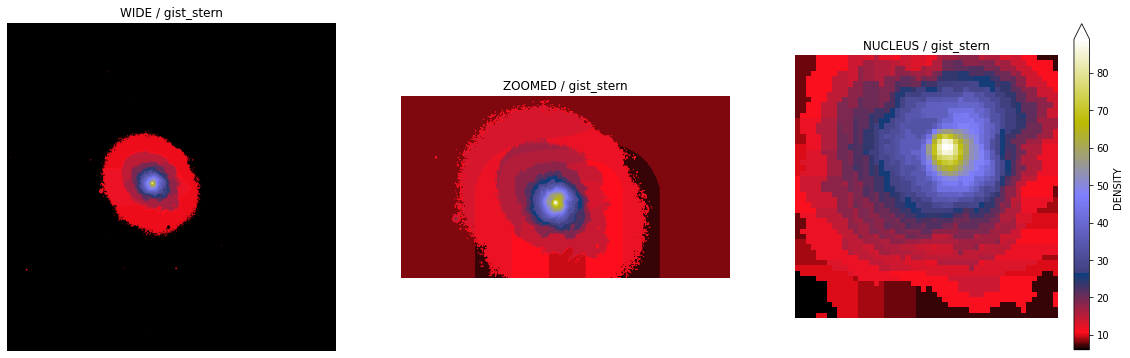

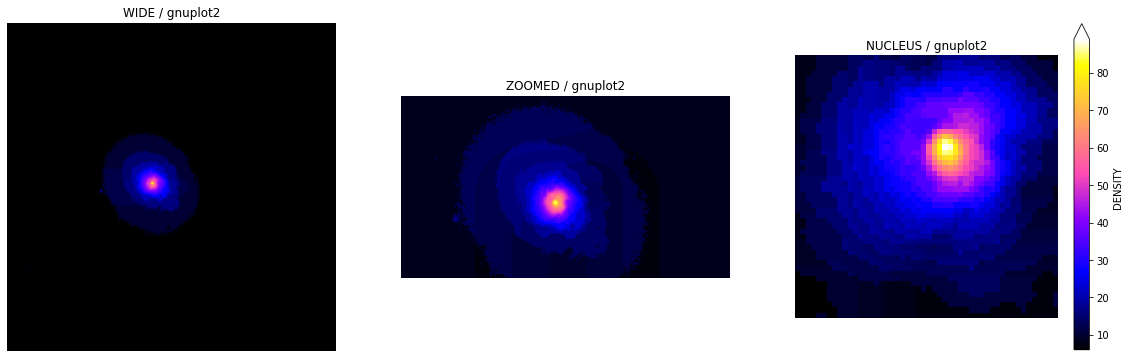

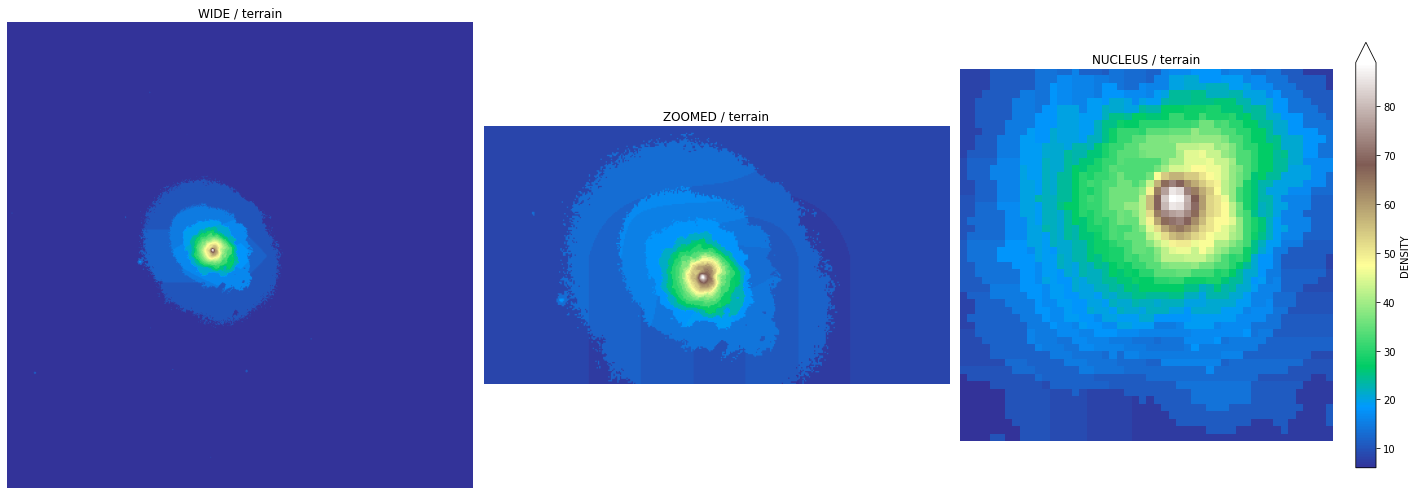

In [19]:
Clahe_Func = cv2.createCLAHE(clipLimit=3.0,tileGridSize=(3,3))
CLAHE_WIDE=Clahe_Func.apply(WIDE_SCALE_HST.astype(np.uint8))
CLAHE_ZOOMED_X2 = Clahe_Func.apply(ZOOMED_X3_SCALE_HST.astype(np.uint8))
CLAHE_NUCLEUS_CLAHE = Clahe_Func.apply(NUCLEUS_SCALE_HST.astype(np.uint8))
SPECTRAL_LIST = ["jet","hot","nipy_spectral","gist_ncar","gist_earth","gist_stern","gnuplot2",'terrain']
for x_spec in SPECTRAL_LIST:
    figure,axis = plt.subplots(1,3,figsize=(20,20))
    axis[0].imshow(CLAHE_WIDE,cmap=x_spec)
    axis[0].set_title("WIDE" + " / "+ x_spec)
    axis[0].axis("off")
    axis[1].imshow(CLAHE_ZOOMED_X2,cmap=x_spec)
    axis[1].set_title("ZOOMED" + " / "+ x_spec)
    axis[1].axis("off")
    DENSITY_FUNC = axis[2].imshow(CLAHE_NUCLEUS_CLAHE,cmap=x_spec)
    axis[2].set_title("NUCLEUS" + " / "+ x_spec)
    axis[2].axis("off")
    figure.colorbar(DENSITY_FUNC,shrink=0.3,label="DENSITY",extend="max")
plt.tight_layout()
plt.show()

In [20]:
FCF_WIDE_SCALE_HST = skimage.feature.corner_foerstner(WIDE_SCALE_HST)
FCF_ZOOMED_X3_SCALE_HST = skimage.feature.corner_foerstner(ZOOMED_X3_SCALE_HST)
FCF_NUCLEUS_SCALE_HST = skimage.feature.corner_foerstner(NUCLEUS_SCALE_HST)



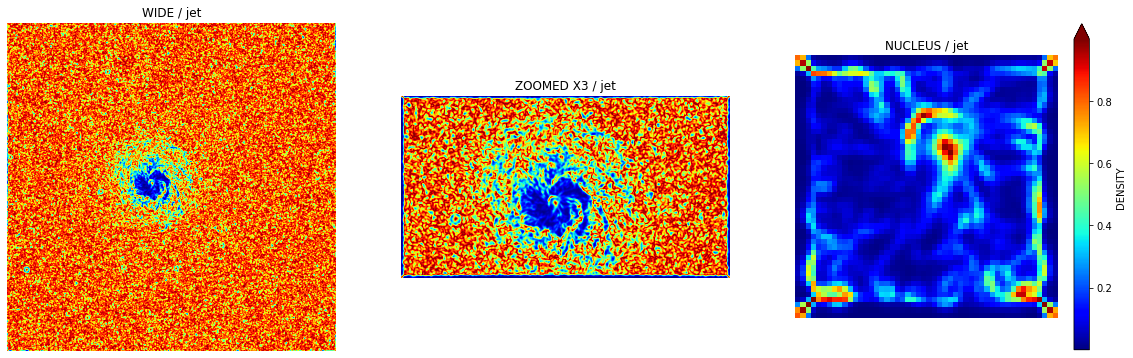

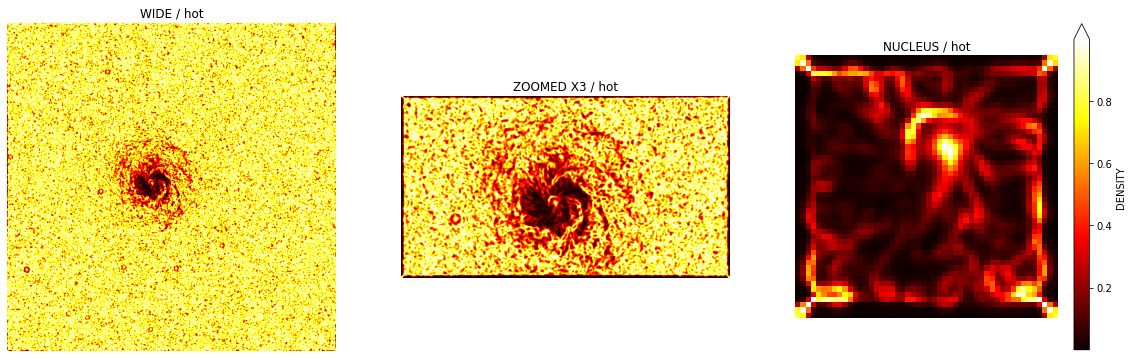

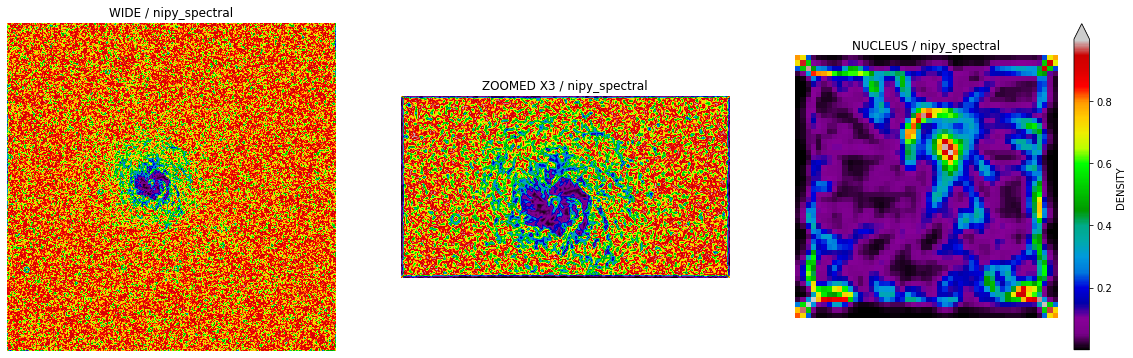

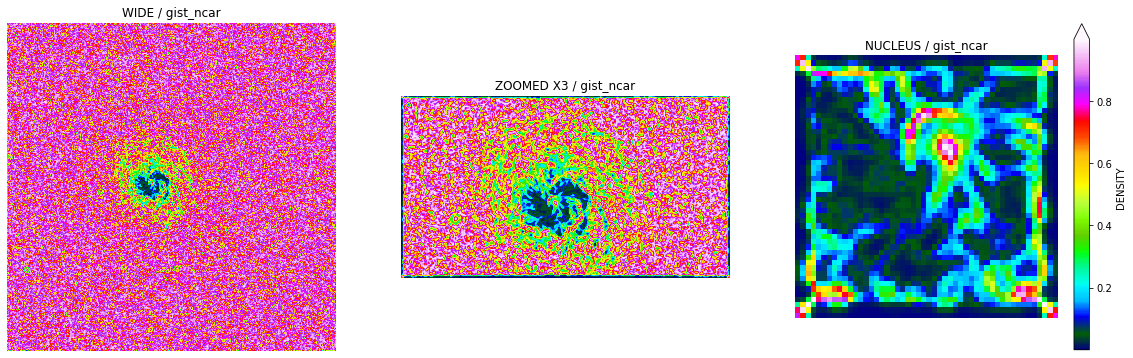

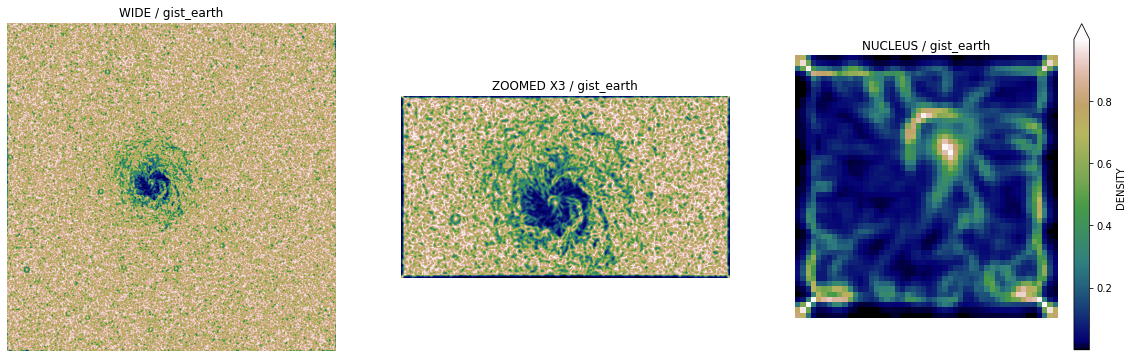

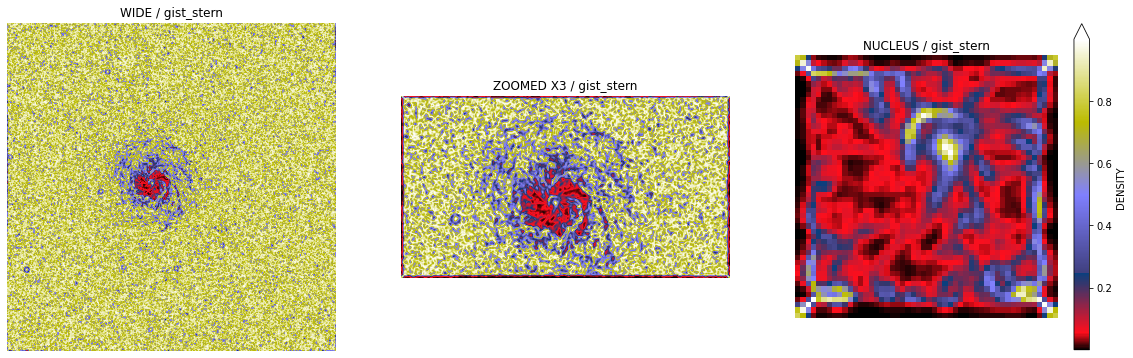

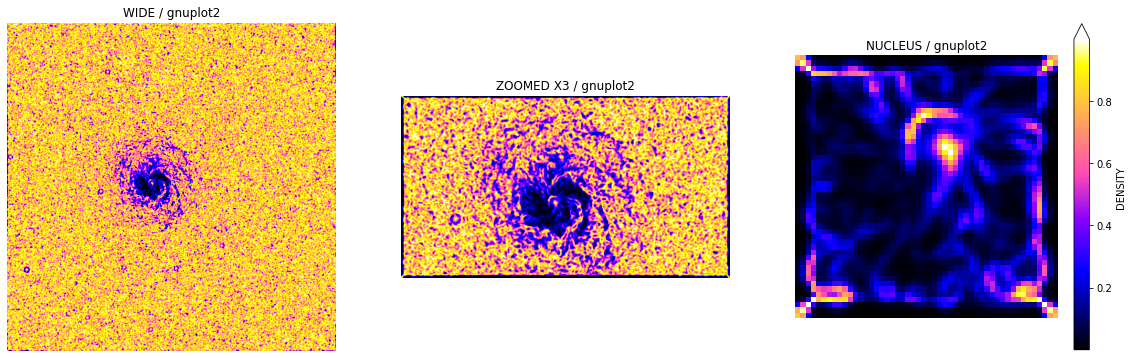

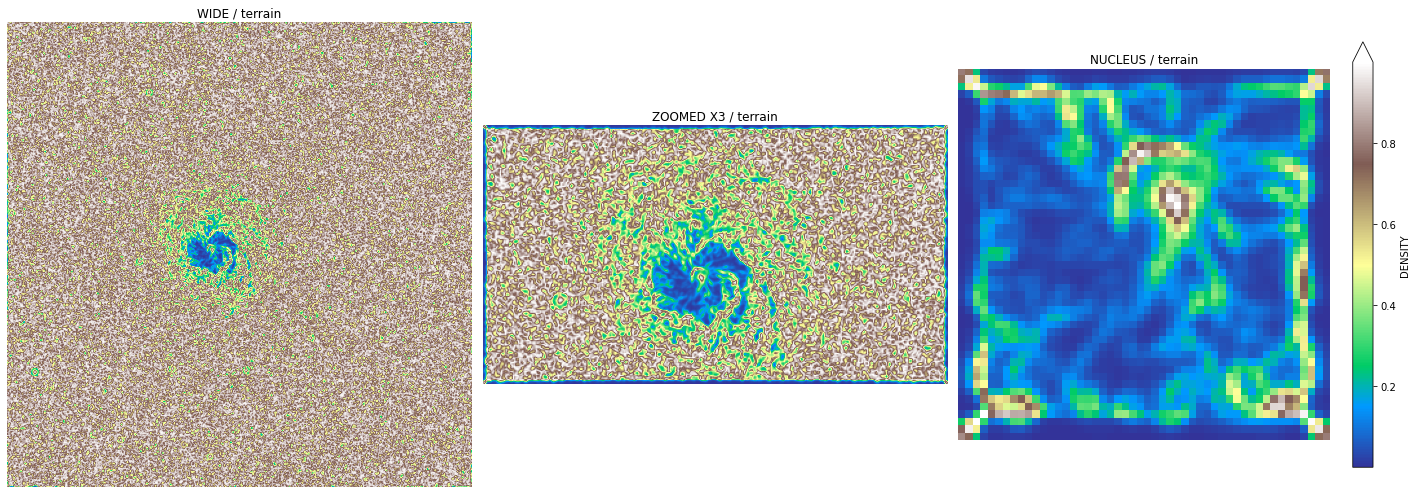

In [21]:
SPECTRAL_LIST = ["jet","hot","nipy_spectral","gist_ncar","gist_earth","gist_stern","gnuplot2",'terrain']
            
for x_spec in SPECTRAL_LIST:            
  figure,axis = plt.subplots(1,3,figsize=(20,20))
  axis[0].imshow(FCF_WIDE_SCALE_HST[1],cmap=x_spec)
  axis[0].set_title("WIDE" + " / "+ x_spec)
  axis[0].axis("off")
  axis[1].imshow(FCF_ZOOMED_X3_SCALE_HST[1],cmap=x_spec)
  axis[1].set_title("ZOOMED X3" + " / "+ x_spec)
  axis[1].axis("off")
  DENSITY_FUNC = axis[2].imshow(FCF_NUCLEUS_SCALE_HST[1],cmap=x_spec)
  axis[2].set_title("NUCLEUS" + " / "+ x_spec)
  axis[2].axis("off")
  figure.colorbar(DENSITY_FUNC,shrink=0.3,label="DENSITY",extend="max")
plt.tight_layout()
plt.show()

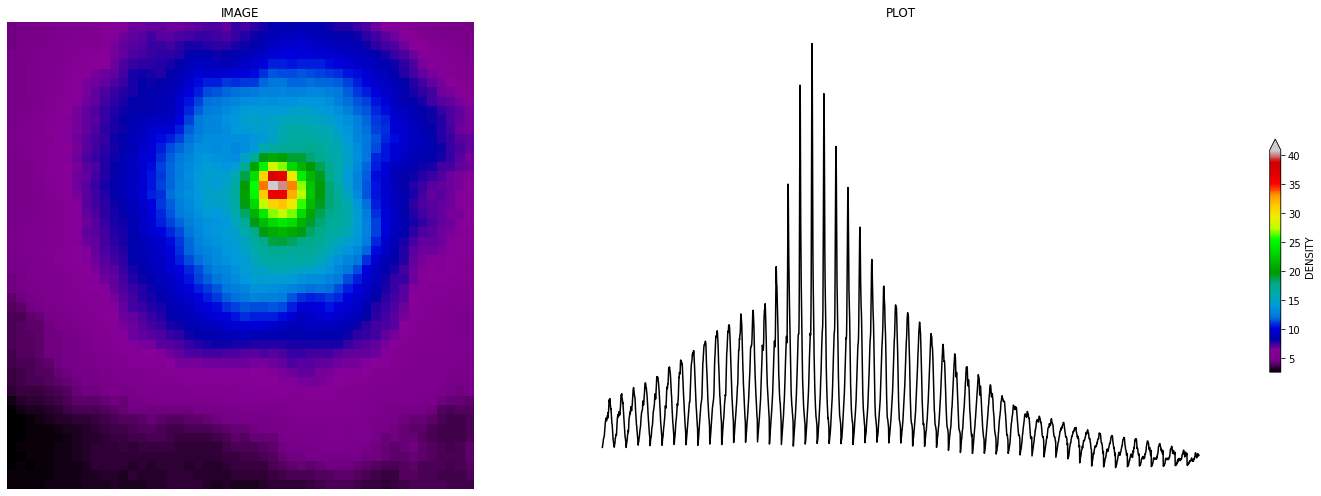

In [22]:
figure,axis = plt.subplots(1,2,figsize=(22,7))
    
DENSITY_FUNC = axis[0].imshow(NUCLEUS_SCALE_HST,cmap="nipy_spectral")
axis[0].set_title("IMAGE")
axis[0].axis("off")
    
axis[1].plot(NUCLEUS_SCALE_HST.flatten(),color="black")
axis[1].set_title("PLOT")
axis[1].axis("off")
    
figure.colorbar(DENSITY_FUNC,shrink=0.5,label="DENSITY",extend="max")
plt.tight_layout()
plt.show()

In [24]:
data = ZOOMED_X3_SCALE_HST.flatten()
data2 = CLAHE_NUCLEUS_CLAHE.flatten()

In [25]:
data.shape,data2.shape

((72000,), (72000,))

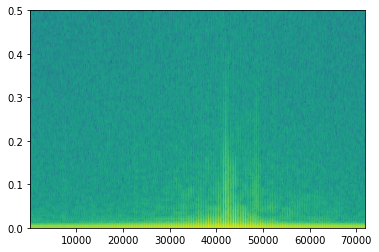

In [27]:
powerSpectrum_1 ,freqenciesFound_1 ,time_1,imageAxis_1=plt.specgram(data,Fs = 1)

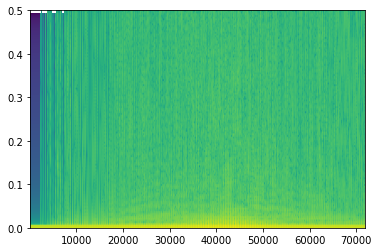

In [29]:
powerSpectrum_1, freqenciesFound_1, time_1, imageAxis_1=plt.specgram(data2,Fs = 1)

1) From the Clahe feature detection we can kind off make out the presence of Black Hole.

2) From the Corner Foerstner feature we can confirm the presence of a black hole at the center of the galaxy M91.

3) From the 'nipy spectral' colormap and the spectrum we can see the peaks which indicate the presence of a black hole.

4) From the power spectrum of the nucleus we can concur the presence of black hole

Messier 91 (NGC 4548) is a barred spiral galaxy that is found in the south of Coma Berenices. It is in the local supercluster and is part of the Virgo Cluster of galaxies. It is about 63 million light-years away from our galaxy. It was the last of a group of eight "nebulae" discovered by Charles Messier in 1781. Messier 91 in the Virgo cluster was confirmed in 1997 from observing Cepheid variables which place it at 52±6 million light years away.Its bar is very conspicuous – it is seen with position angle of 65 to 245 degrees when being measured from the North direction to the East.

Galactic Latitude: 76.829620 [deg]

Galactic Longitude: 285.693280 [deg]

RA: 188.860220 [deg]

Dec: 14.496340 [deg]

Redshift: 0.001599

M91 is one of over a thousand galaxies that make up the Virgo cluster — a group of galaxies that are gravitationally bound to one another. It is an anemic galaxy, meaning that it has a lower rate of star formation compared to other spiral galaxies.

M91 has been studied for more than 200 years. There have been many articles and research papers on galaxy M 91. There are research papers on kinematics of the galaxy. There have been papers on nuclear activities of the galaxy and on magnetic fields of the Galaxy and the Virgo Cluster Spirals.

It is Hypothesized that M91 has a Massive Black Hole at the center of the Galaxy

To prove the hypothesis, the data is collected from various missions. We use the Optical Hubble Space Telescope data. By filtering and applying different filters we can clean out the image to focus on what is required. Lastly by applying Feature Detection we can see the characteristics of a black hole. The best can be seen in 'corner_foernster' feature detection on 'jet' or 'gist_earth' colormap which shows the features of presence of a black hole.

By using the data provided and by running it through various filters and colormaps and feature detection processes we can isolate the data and get the information required for our research.